<a href="https://colab.research.google.com/github/Aggie2024/Time-Series/blob/main/Chicago_Crime_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Data
- Original Source: Chicago Data Portal: Crimes 2001 to Present

- Data Description: All Crimes that were reported in the city of Chicago and their details.
- Includes:

 - ID: Unique identifier for the record.
 - Date: Date when the incident occurred.
 -  Primary Type: The primary description of the crime.
 - Description: The secondary description of the crime, a subcategory of the primary description.
 - Location Description: Description of the location where the incident occurred.
 - Arrest: Indicates whether an arrest was made.
 - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
 - Beat: Indicates the beat where the incident occurred. A beat is the
 - District: Indicates the police district where the incident occurred.
 - Ward: The ward (City Council district) where the incident occurred.
 - Updated On: Date and time the record was last updated.
 - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
 - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [2]:
# Use glob to select the files ending in .csv
import glob
folder = "/content/drive/MyDrive/CodingDojo/Project_ChicagoCrime/Data"
crime_files = sorted(glob.glob(folder +"/*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [3]:
df.tail()

ID                    Date        Primary Type  \
238853  12938029  12/31/2022 12:50:00 PM             ASSAULT   
238854  12937822  12/31/2022 12:50:00 PM             ASSAULT   
238855  12937583  12/31/2022 12:52:00 AM             BATTERY   
238856  12938420  12/31/2022 12:52:00 PM             ASSAULT   
238857  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                    Description          Location Description  \
238853                                   SIMPLE                     APARTMENT   
238854                     AGGRAVATED - HANDGUN                     APARTMENT   
238855                                   SIMPLE                    BARBERSHOP   
238856                                   SIMPLE  COMMERCIAL / BUSINESS OFFICE   
238857  FINANCIAL IDENTITY THEFT $300 AND UNDER                     RESIDENCE   

        Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  
238853   False     False  1014      10.0  24.0  41.855911 -87.719966  
238854   False      True   733       7.0   6.0  41.766546 -87.645669  
238855   False     False  1135      11.0  28.0  41.868829 -87.686098  
238856   False     False  1432      14.0  32.0  41.930693 -87.685657  
238857   False     False  1511      15.0  29.0        NaN        NaN

In [4]:
#change column "Date" to a datatime
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting and sorting the index
df.index = pd.DatetimeIndex(df.Date)
df.head()

ID                Date     Primary Type  \
Date                                                                
2001-01-01 01:00:00  1326041 2001-01-01 01:00:00          BATTERY   
2001-01-01 13:00:00  1319931 2001-01-01 13:00:00          BATTERY   
2001-01-01 13:00:00  1324743 2001-01-01 13:00:00         GAMBLING   
2001-01-01 01:00:00  1310717 2001-01-01 01:00:00  CRIMINAL DAMAGE   
2001-01-01 01:00:00  1318099 2001-01-01 01:00:00          BATTERY   

                             Description     Location Description  Arrest  \
Date                                                                        
2001-01-01 01:00:00               SIMPLE                RESIDENCE   False   
2001-01-01 13:00:00               SIMPLE                RESIDENCE   False   
2001-01-01 13:00:00  ILLEGAL ILL LOTTERY                   STREET    True   
2001-01-01 01:00:00           TO VEHICLE                   STREET   False   
2001-01-01 01:00:00               SIMPLE  RESIDENCE PORCH/HALLWAY   False   

                     Domestic  Beat  District  Ward   Latitude  Longitude  
Date                                                                       
2001-01-01 01:00:00     False  1624      16.0   NaN  41.957850 -87.749185  
2001-01-01 13:00:00      True   825       8.0   NaN  41.783892 -87.684841  
2001-01-01 13:00:00     False   313       3.0   NaN  41.780412 -87.611970  
2001-01-01 01:00:00     False  2424      24.0   NaN  42.012391 -87.678032  
2001-01-01 01:00:00      True   214       2.0   NaN  41.819538 -87.620020

In [5]:
#sort the index
df = df.sort_index()
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [6]:
df.drop(['ID','Beat','Ward'], inplace=True, axis=1)
df.head()

Date                Primary Type  \
Date                                                
2001-01-01 2001-01-01                       THEFT   
2001-01-01 2001-01-01                       THEFT   
2001-01-01 2001-01-01  OFFENSE INVOLVING CHILDREN   
2001-01-01 2001-01-01                       THEFT   
2001-01-01 2001-01-01                 SEX OFFENSE   

                              Description               Location Description  \
Date                                                                           
2001-01-01  FINANCIAL ID THEFT: OVER $300                             STREET   
2001-01-01        AGG: FINANCIAL ID THEFT                          RESIDENCE   
2001-01-01  SEX ASSLT OF CHILD BY FAM MBR                          RESIDENCE   
2001-01-01  FINANCIAL ID THEFT: OVER $300                          RESIDENCE   
2001-01-01      AGG CRIMINAL SEXUAL ABUSE  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   

            Arrest  Domestic  District   Latitude  Longitude  
Date                                                          
2001-01-01   False     False      22.0  41.732563 -87.669923  
2001-01-01   False     False       8.0  41.778094 -87.770137  
2001-01-01   False     False       2.0  41.807275 -87.593707  
2001-01-01   False     False       9.0  41.806311 -87.674782  
2001-01-01   False     False      10.0        NaN        NaN

### Most committed crimes in Chicago



In [7]:
# Inspect the value_counts for the different types of crimes
Total_Crime_Type = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
Total_Crime_Type

Total # of Crimes
Primary Type                                        
THEFT                                        1626992
BATTERY                                      1410889
CRIMINAL DAMAGE                               878914
NARCOTICS                                     746155
ASSAULT                                       501103
OTHER OFFENSE                                 479174
BURGLARY                                      422246
MOTOR VEHICLE THEFT                           366586
DECEPTIVE PRACTICE                            340958
ROBBERY                                       289677
CRIMINAL TRESPASS                             212869
WEAPONS VIOLATION                             103906
PROSTITUTION                                   69750
OFFENSE INVOLVING CHILDREN                     55280
PUBLIC PEACE VIOLATION                         52086
SEX OFFENSE                                    30442
CRIM SEXUAL ASSAULT                            27584
INTERFERENCE WITH PUBLIC OFFICER               18206
LIQUOR LAW VIOLATION                           14846
GAMBLING                                       14616
ARSON                                          13121
HOMICIDE                                       12394
KIDNAPPING                                      7185
CRIMINAL SEXUAL ASSAULT                         6353
STALKING                                        4664
INTIMIDATION                                    4595
CONCEALED CARRY LICENSE VIOLATION               1019
OBSCENITY                                        810
PUBLIC INDECENCY                                 193
NON-CRIMINAL                                     181
OTHER NARCOTIC VIOLATION                         147
HUMAN TRAFFICKING                                 96
NON - CRIMINAL                                    38
RITUALISM                                         24
NON-CRIMINAL (SUBJECT SPECIFIED)                   9
DOMESTIC VIOLENCE                                  1

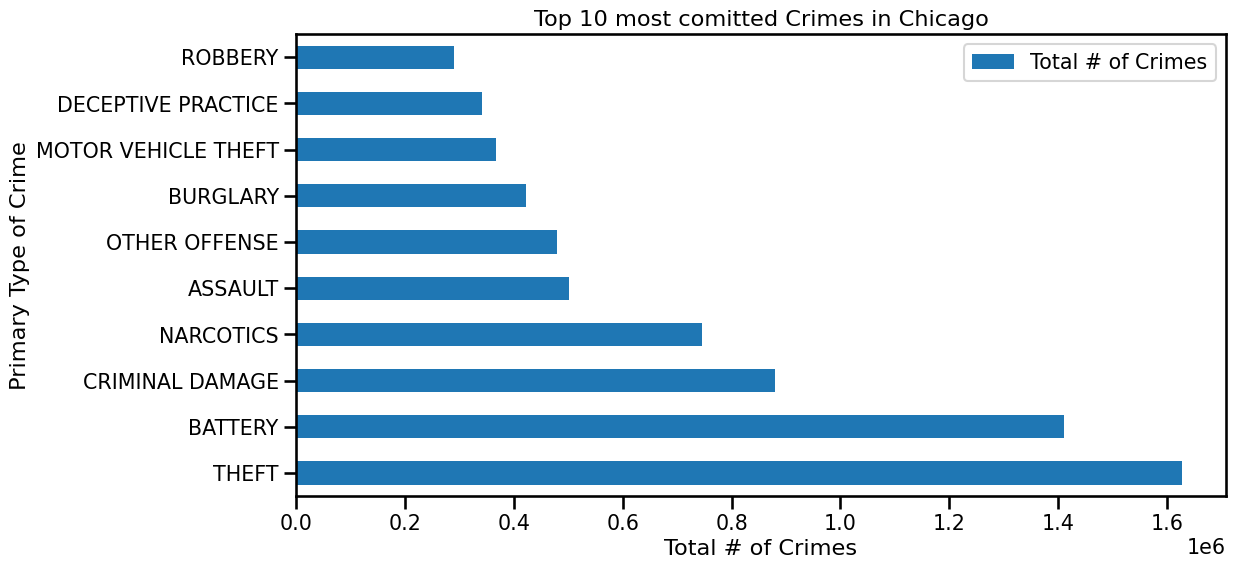

In [9]:
# Visualise the top 10 crimes
Total_Crime_Type[:10].plot(kind='barh',figsize=(12,6),
                  title = "Top 10 most comitted Crimes in Chicago",
                  xlabel = "Total # of Crimes", ylabel = "Primary Type of Crime");

The most common crime in Chicago is Theft, followed by Battery and Criminal Damage respectively.

### Topic 1) Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [11]:
crimes_2022 = df.loc['2022']

In [17]:
crime_by_district = crimes_2022['District'].value_counts().to_frame('Total # of Crimes 2022')
crime_by_district

Total # of Crimes 2022
District                        
8.0                        14805
6.0                        14694
12.0                       14341
4.0                        13931
11.0                       13457
1.0                        13044
18.0                       12429
19.0                       12243
25.0                       11951
3.0                        11937
2.0                        11793
9.0                        10376
7.0                        10319
10.0                        9961
5.0                         9773
16.0                        9226
24.0                        8469
15.0                        8308
14.0                        8158
22.0                        7671
17.0                        6997
20.0                        4960
31.0                          15

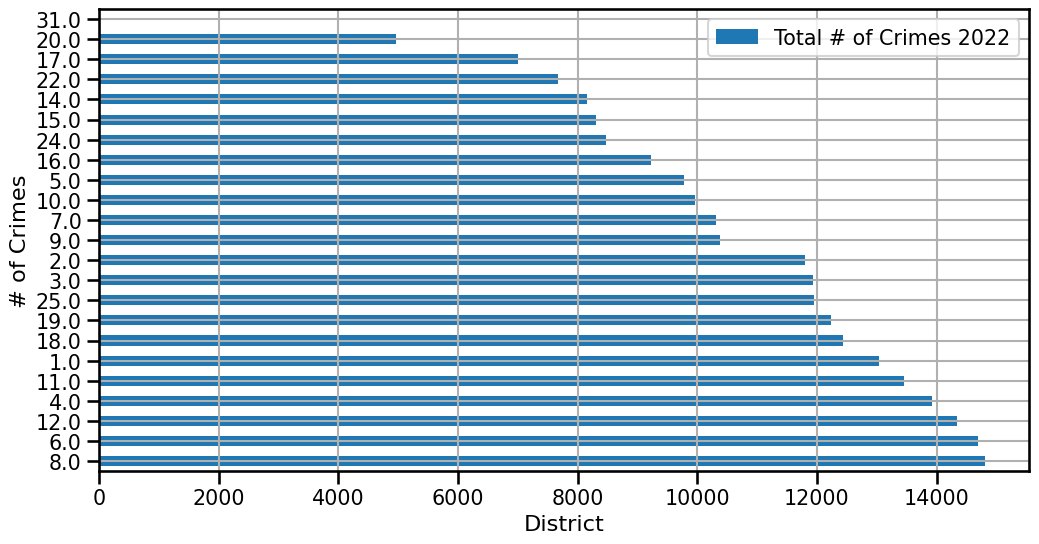

In [19]:
## Plot crimes by district
crime_by_district.plot(kind='barh',figsize=(12,6),
                       grid=True, ylabel='# of Crimes', xlabel='District');

Districts 8, 6 and 12 had the highest crime rate in 2022 with over 14k crimes reported in each.
Districts 31 and 20 had the least crime in 2022.

### Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [28]:
df['Year'] = df.index.year
year_counts = df.groupby([df.Year]).size().to_frame('Total # of Crimes')
year_counts

Total # of Crimes
Year                   
2001             485886
2002             486807
2003             475985
2004             469422
2005             453773
2006             448179
2007             437087
2008             427183
2009             392827
2010             370513
2011             351993
2012             336319
2013             307536
2014             275789
2015             264787
2016             269823
2017             269100
2018             268899
2019             261325
2020             212194
2021             208824
2022             238858

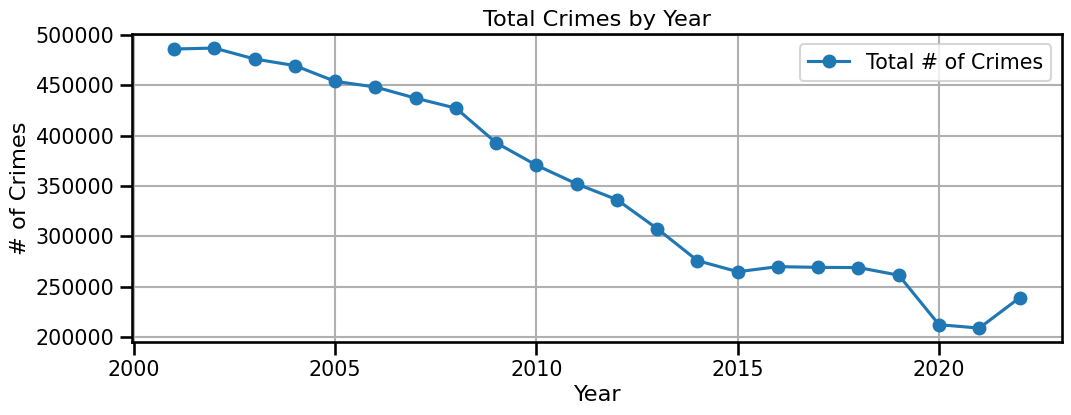

In [29]:
## save year counts
year_counts.plot(style='o-', grid=True, ylabel='# of Crimes', xlabel='Year',
                 title = "Total Crimes by Year");

Crime rate has generally been falling since 2000 to 2022 from a total of over 480k reported crimes in 2001 to just over 230k crimes in 2022.

In [30]:
# Inspect individual crimes annually
crimes_by_year = df.groupby('Year')['Primary Type'].value_counts(normalize=False)
crimes_by_year

Year  Primary Type            
2001  THEFT                       99277
      BATTERY                     93461
      CRIMINAL DAMAGE             55859
      NARCOTICS                   50567
      ASSAULT                     31384
                                  ...  
2022  HUMAN TRAFFICKING              17
      GAMBLING                        9
      OTHER NARCOTIC VIOLATION        7
      NON-CRIMINAL                    5
      PUBLIC INDECENCY                5
Name: count, Length: 689, dtype: int64

In [31]:
# convert to dataframe and reset_index()
plot_df1 = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df1

Year              Primary Type  # of Crimes
0    2001                     THEFT        99277
1    2001                   BATTERY        93461
2    2001           CRIMINAL DAMAGE        55859
3    2001                 NARCOTICS        50567
4    2001                   ASSAULT        31384
..    ...                       ...          ...
684  2022         HUMAN TRAFFICKING           17
685  2022                  GAMBLING            9
686  2022  OTHER NARCOTIC VIOLATION            7
687  2022              NON-CRIMINAL            5
688  2022          PUBLIC INDECENCY            5

[689 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


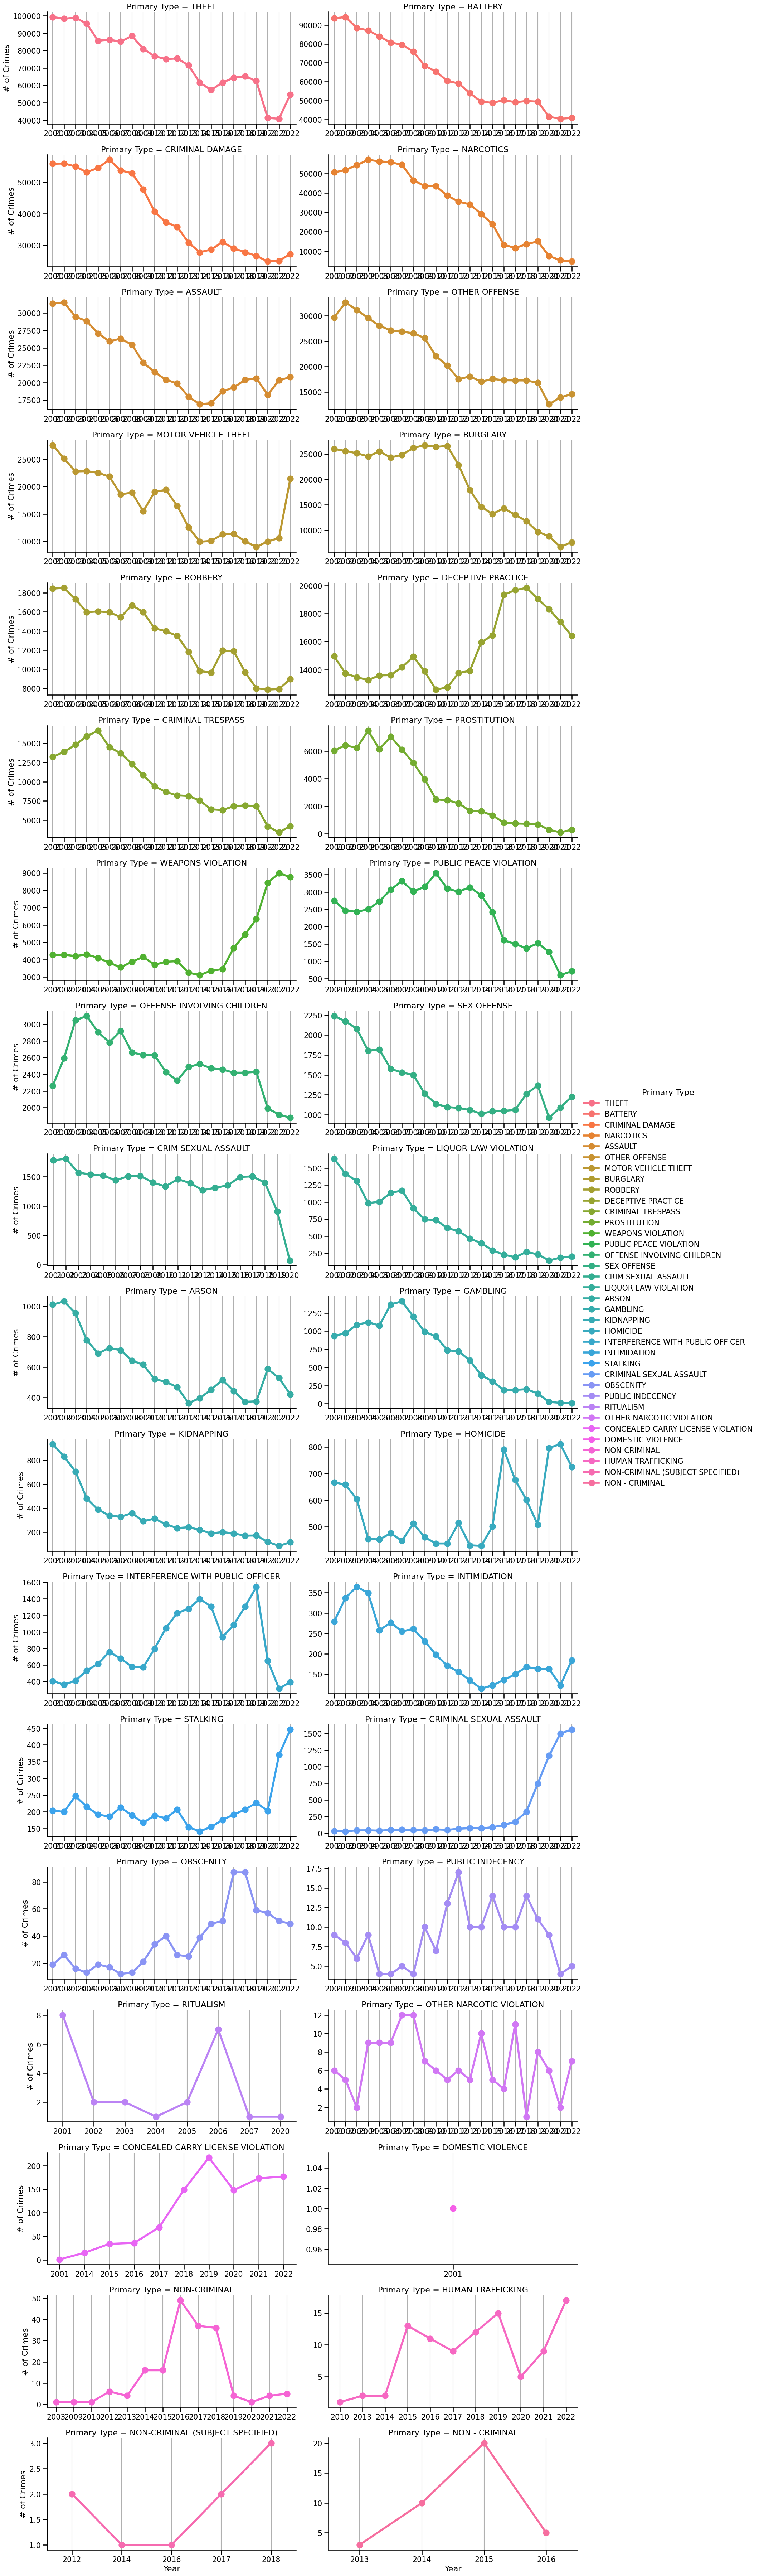

In [32]:
g = sns.catplot(data= plot_df1, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Generally, the primary crimes follow a reducing trend over the years, however some crimes are on the rise: Deceptive practice, Weapon Violation, Homicide, Stalking, Obscenity and Concealed carry license violiations.

### Topic 4a) Comparing Months: What months have the most crime? What months have the least?

In [20]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()

# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

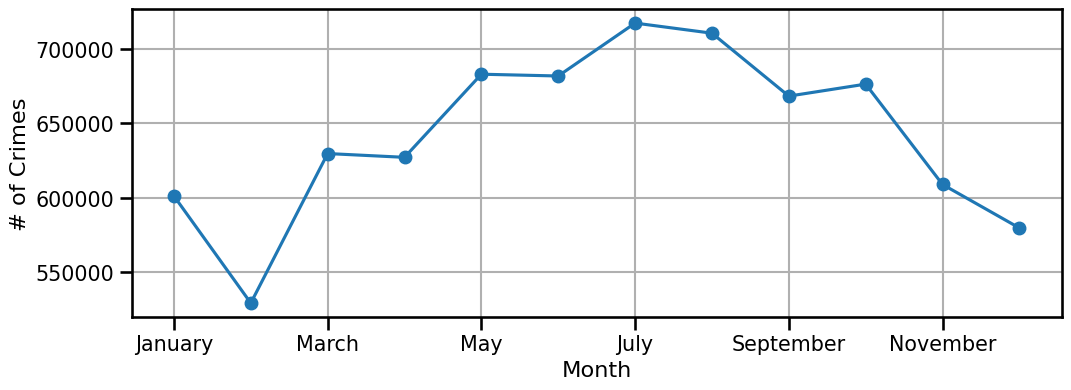

In [27]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

Most crimes occur in July and August during the summer, while the least crimes occur in February and overall Dec/Jan have the lowest crime rate as well.

b) Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [21]:
# looping through the value counts series
crimes_by_month = df.groupby('Month')['Primary Type'].value_counts(normalize=False)
crimes_by_month

Month  Primary Type                    
1      THEFT                               123454
       BATTERY                             101302
       NARCOTICS                            65943
       CRIMINAL DAMAGE                      62574
       OTHER OFFENSE                        42162
                                            ...  
12     OTHER NARCOTIC VIOLATION                 8
       HUMAN TRAFFICKING                        4
       RITUALISM                                3
       NON-CRIMINAL (SUBJECT SPECIFIED)         1
       NON - CRIMINAL                           1
Name: count, Length: 415, dtype: int64

In [22]:
# convert to dataframe and reset_index()
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df

Month                      Primary Type  # of Crimes
0        1                             THEFT       123454
1        1                           BATTERY       101302
2        1                         NARCOTICS        65943
3        1                   CRIMINAL DAMAGE        62574
4        1                     OTHER OFFENSE        42162
..     ...                               ...          ...
410     12          OTHER NARCOTIC VIOLATION            8
411     12                 HUMAN TRAFFICKING            4
412     12                         RITUALISM            3
413     12  NON-CRIMINAL (SUBJECT SPECIFIED)            1
414     12                    NON - CRIMINAL            1

[415 rows x 3 columns]

In [24]:
# normalize with percentage
crime_perc_by_month = df.groupby('Primary Type')['Month'].value_counts(normalize=True).sort_index()
crime_perc_by_month

Primary Type       Month
ARSON              1        0.069888
                   2        0.061504
                   3        0.084673
                   4        0.083606
                   5        0.093743
                              ...   
WEAPONS VIOLATION  8        0.095153
                   9        0.090803
                   10       0.088445
                   11       0.076531
                   12       0.071228
Name: proportion, Length: 415, dtype: float64

In [25]:
## Convert to dataframe and reset index
plot_df_perc = crime_perc_by_month.to_frame('# of Crimes').reset_index()
plot_df_perc

Primary Type  Month  # of Crimes
0                ARSON      1     0.069888
1                ARSON      2     0.061504
2                ARSON      3     0.084673
3                ARSON      4     0.083606
4                ARSON      5     0.093743
..                 ...    ...          ...
410  WEAPONS VIOLATION      8     0.095153
411  WEAPONS VIOLATION      9     0.090803
412  WEAPONS VIOLATION     10     0.088445
413  WEAPONS VIOLATION     11     0.076531
414  WEAPONS VIOLATION     12     0.071228

[415 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


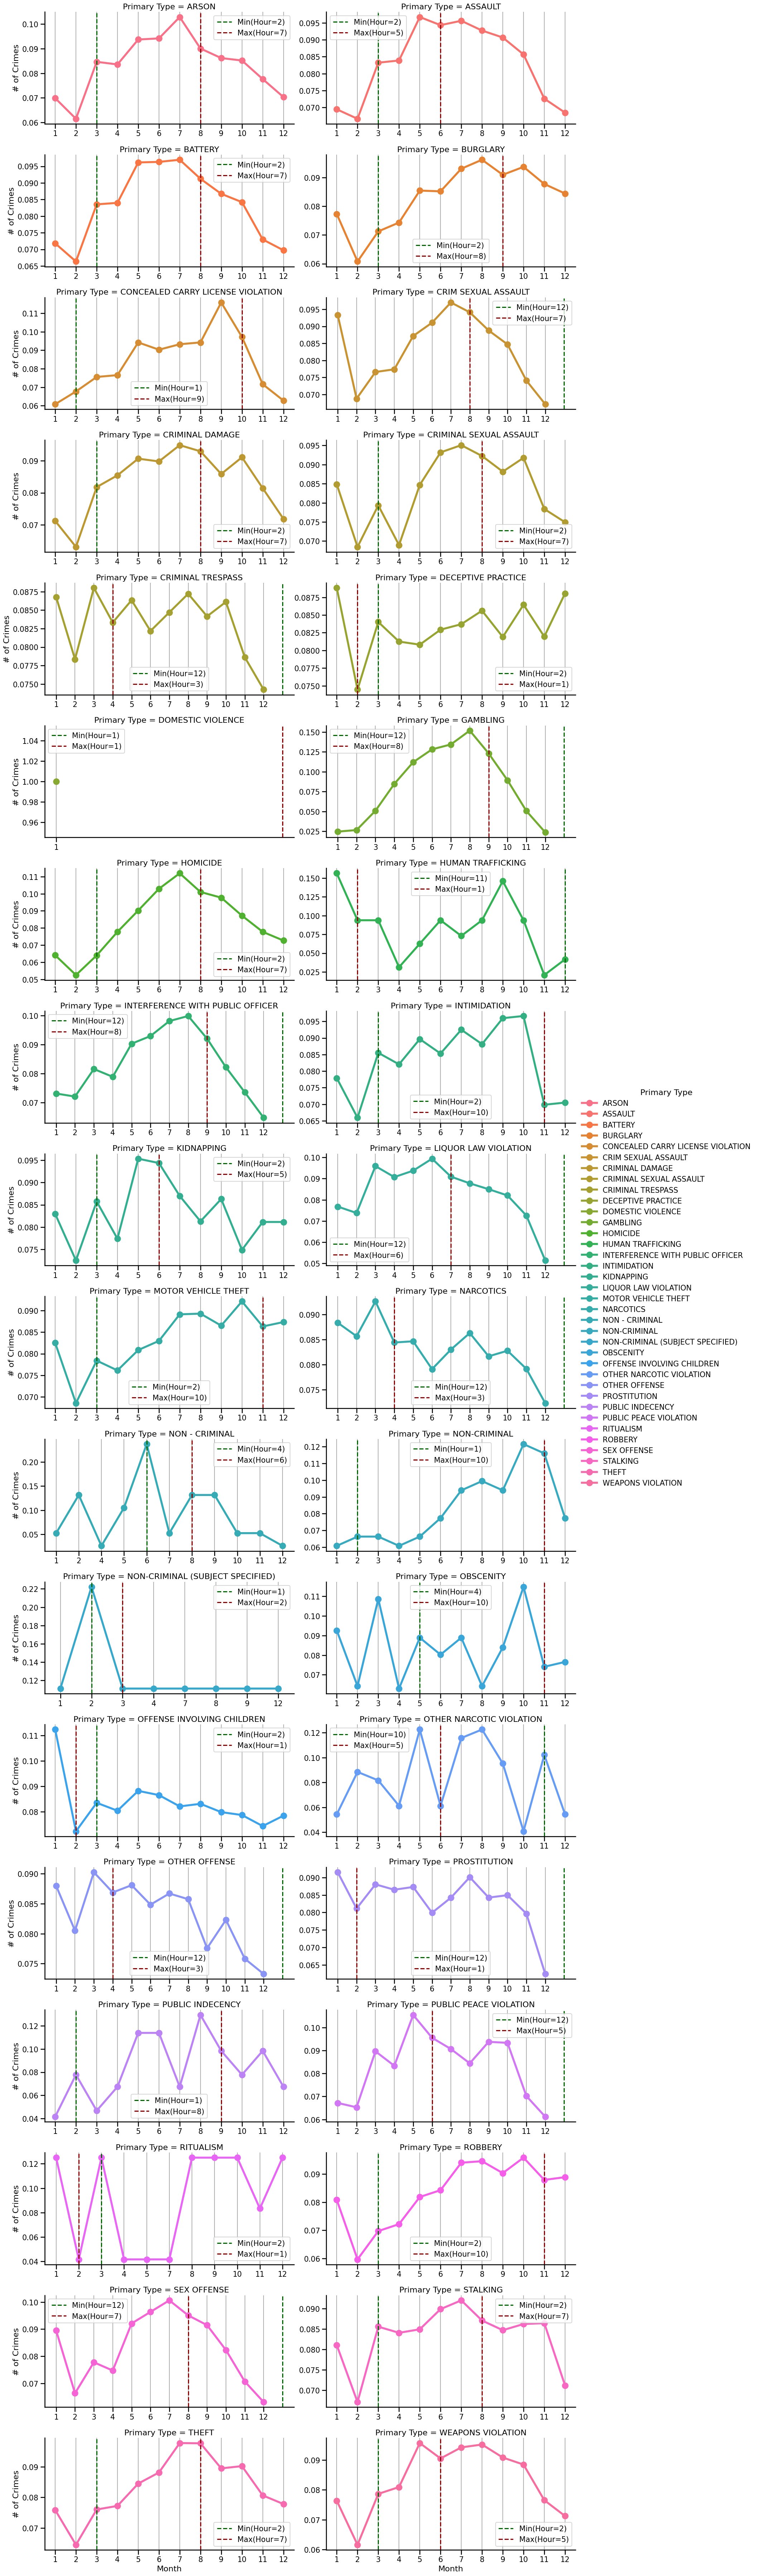

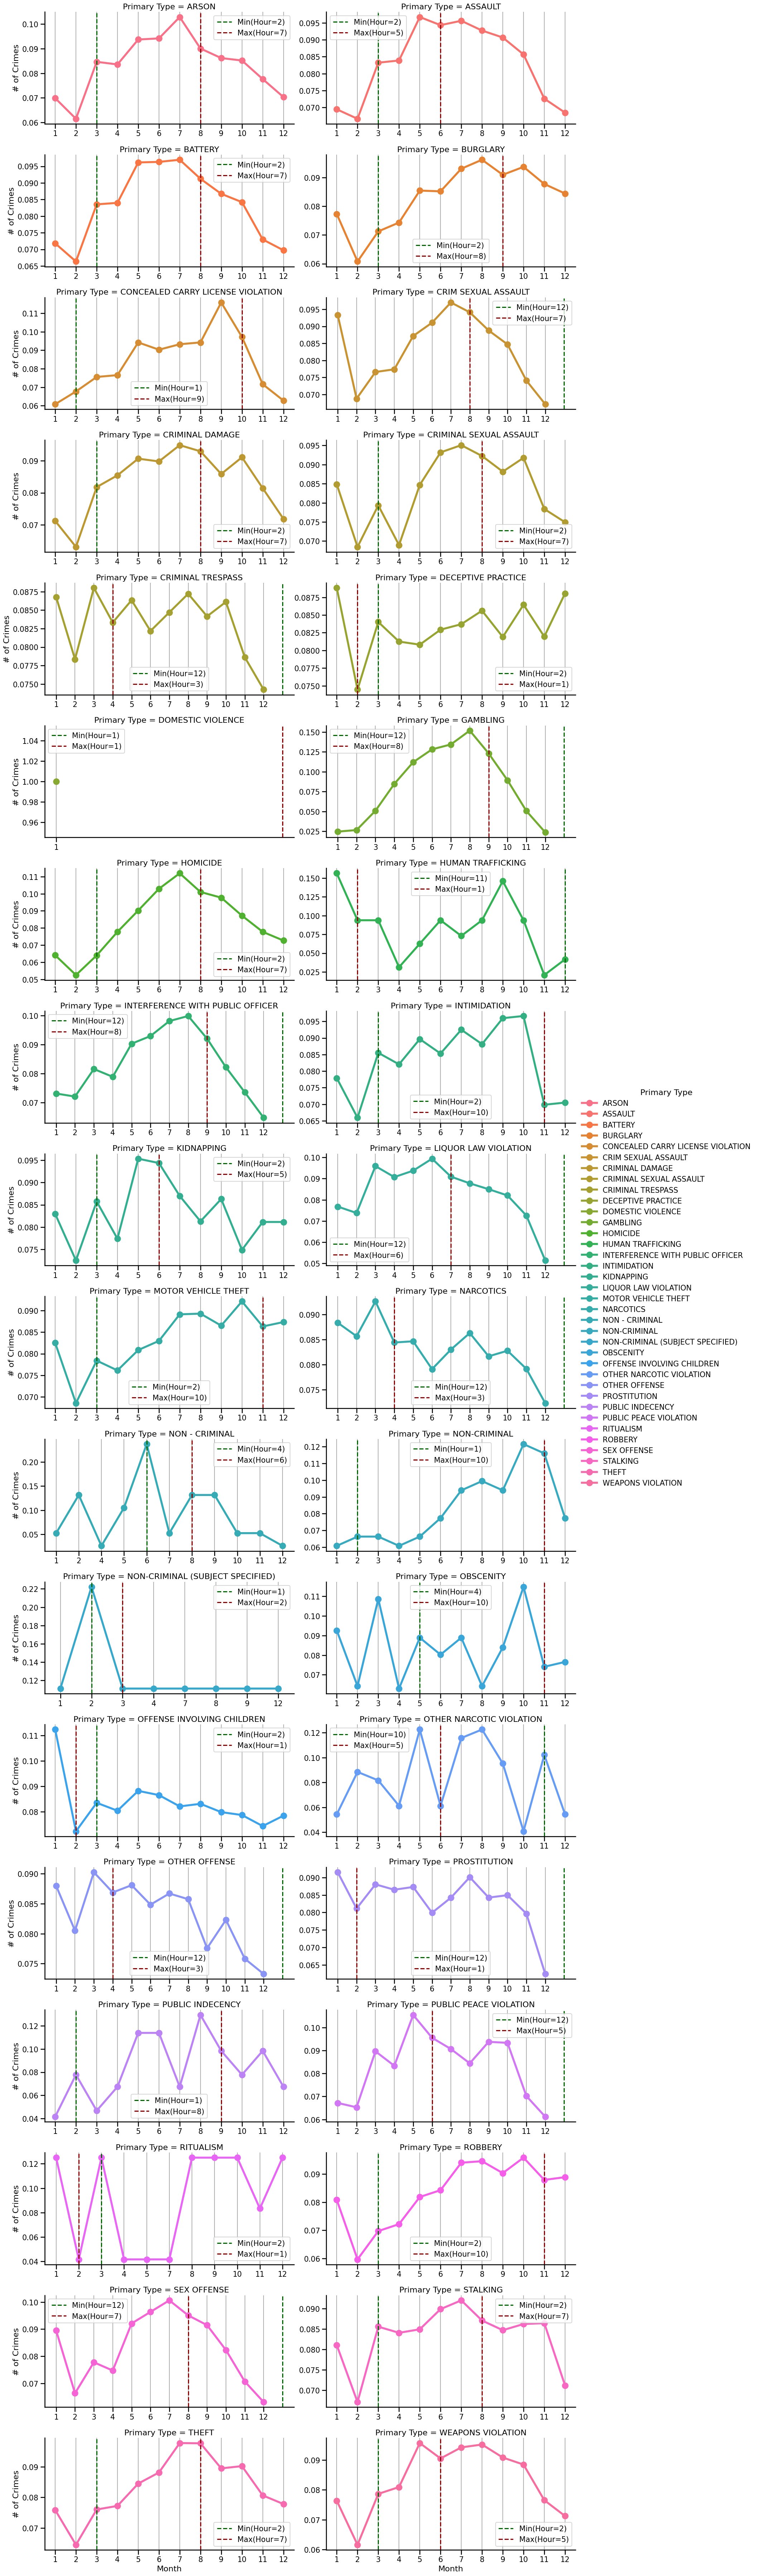

In [26]:
g = sns.catplot(data=plot_df_perc, x='Month', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():

    ## Extract the idx min and idxmax from the val counts
    min_, max_ = crime_perc_by_month.loc[col].agg(['idxmin','idxmax'])

    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'

    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'

    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')

g.fig